# Задание

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
name2question = data.iloc[0] 
data_without_question = data.drop(labels = [0],axis = 0)

## Задание 1

Используя библиотеку matplotlib, построй круговую диаграмму (Pie plot) для возраста респондента.

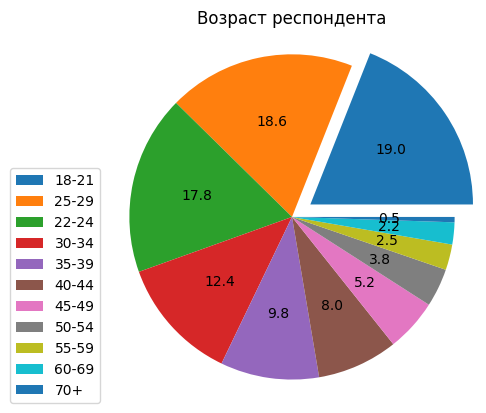

In [101]:
sizes_for_l = data_without_question.Q2.value_counts()
sizes = sizes_for_l.tolist()
labels = []
lenz = sizes_for_l.shape[0]
for i in range(lenz): labels.append(sizes_for_l.index[i])
explode = []
for i in range (lenz):
    if (i == 0): explode.append(0.15)
    else: explode.append(0)
fig, ax = plt.subplots()
plt.title('Возраст респондента', loc = 'center')
ax.pie(sizes, explode=explode, labels=None, autopct='%1.1f', radius = 1.1, startangle = 360)
plt.legend(bbox_to_anchor = (-0.3, 0.4, 0.3, 0.25), loc = 'best', labels = labels)
plt.show()


## Задание 2

Используя библиотеку seaborn, построй столбцовую диаграмму (Bar plot) по популярности библиотек для визуализации.

Text(0.5, 0, 'Количество')

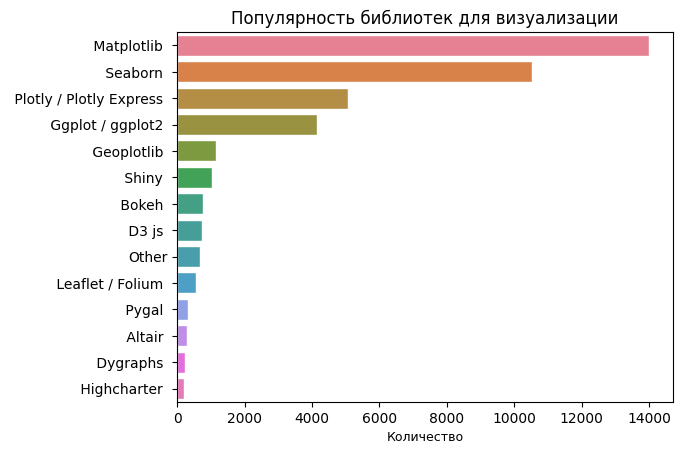

In [102]:
q15_columns = [col for col in data_without_question.columns if col.startswith('Q15')]
q15_columns2 =[]
for i in q15_columns:
    if(i != 'Q15_14'):
        q15_columns2.append(i)
libraries = data_without_question[q15_columns2].melt(var_name='Вопрос', value_vars = q15_columns2)
result = libraries['value'].value_counts()
sizes = result.tolist()
labels = []
lenz = result.shape[0]
for i in range(lenz): labels.append(result.index[i])
b = sns.color_palette("husl", 14)
sns.barplot(x = sizes, y = labels, data = data_without_question, label = 'Total', palette = b, edgecolor = 'w').set(title='Популярность библиотек для визуализации')
plt.xlabel('Количество', fontsize=9)

## Задание 3

Используя библиотеку seaborn, построй диаграмму "Ящик с усами" (Box plot) заработка по различным специальностям.

[Text(0.5, 0, 'Годовой доход в $'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Годовой доход по специальностям')]

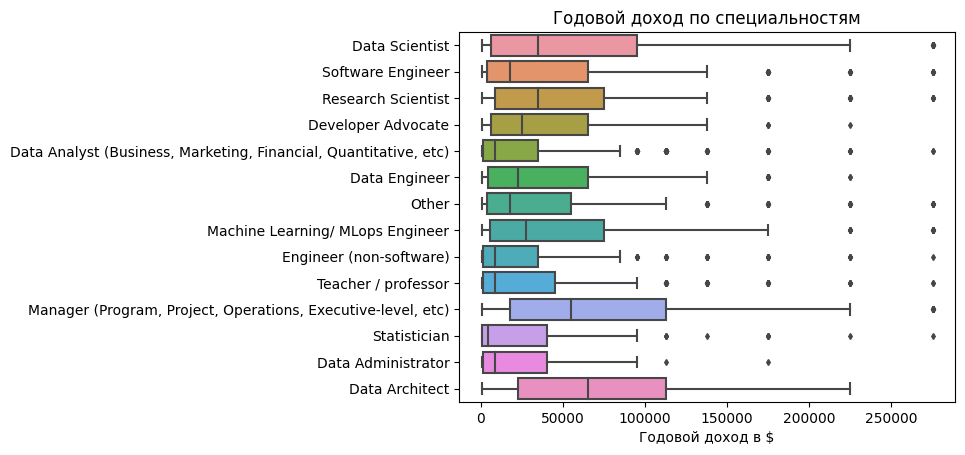

In [103]:
data_for_box_plot = data_without_question[['Q23','Q29']].copy()
data_for_box_plot['Q1'] = np.random.randint(1)
data_for_box_plot = data_for_box_plot.dropna()
selection = []
selection = data_for_box_plot.Q29.tolist()
selection1 =[]
[selection1.append(j.replace('-', ' ').replace(',', '').replace('$', '').replace('>', '').split()) for j in selection]
selection1
selection_final =[]
for j in selection1:
        temp = 0
        for k in j:
            temp += int(k)
        selection_final.append(temp / 2.0)
selection_final
data_for_box_plot['Q1'] = selection_final
data_for_box_plot1 = data_for_box_plot.loc[data_for_box_plot.Q1 < 300000]
ax = sns.boxplot(x=data_for_box_plot1['Q1'], y=data_for_box_plot1['Q23'], fliersize = 3)
ax.set(xlabel='Годовой доход в $', ylabel=None,  title='Годовой доход по специальностям')

## Задание 4
Используя библиотеку plotly, построй столбцовую диаграмму (Bar plot) на распределение респондентов по возрасту по
специальностям Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, 
Research Scientist, Software Engineer, Data Architect

In [104]:
from plotly.subplots import make_subplots 
import plotly.graph_objects as go
r = ['Data Administrator', 'Data Analyst', 'Data Engineer', 'Data Scientist', 'Engineer', 'MLops Engineer', 'Research Scientist', 'Software Engineer', 'Data Architect']
c = []
for i in r: c.append('<i><b>' + i + '<b><i>')
fig = make_subplots(rows=3, cols=3, subplot_titles = c)

labels = []
values = []
data_for_bar_plot = data_without_question[['Q2','Q23']].dropna().copy()
data_for_bar_plot.loc[data_for_bar_plot['Q23'] == 'Machine Learning/ MLops Engineer', 'Q23'] = 'MLops Engineer'
for i in r:
    labels1 = data_for_bar_plot.loc[data_for_bar_plot['Q23'].str.startswith(i), "Q2"].value_counts()
    values.append(sorted(data_for_bar_plot.loc[data_for_bar_plot['Q23'].str.startswith(i), "Q2"].value_counts().index.tolist()))
    labels.append(labels1.sort_index().tolist())

fig.add_trace(go.Bar(x=values[0], y=labels[0], name=r[0]), row=1, col=1)
fig.add_trace(go.Bar(x=values[1], y=labels[1], name=r[1]), row=1, col=2)
fig.add_trace(go.Bar(x=values[2], y=labels[2], name=r[2]), row=1, col=3)
fig.add_trace(go.Bar(x=values[3], y=labels[3], name=r[3]), row=2, col=1)
fig.add_trace(go.Bar(x=values[4], y=labels[4], name=r[4]), row=2, col=2)
fig.add_trace(go.Bar(x=values[5], y=labels[5], name=r[5]), row=2, col=3)
fig.add_trace(go.Bar(x=values[6], y=labels[6], name=r[6]), row=3, col=1)
fig.add_trace(go.Bar(x=values[7], y=labels[7], name=r[7]), row=3, col=2)
fig.add_trace(go.Bar(x=values[8], y=labels[8], name=r[8]), row=3, col=3)

fig.update_layout(height=650, width=900, title_text="<i>Распределение возрастов по специальностям<i>")

![график1](plotly1.png "Title")

## Задание 5

Используя библиотеку plotly, построй карту стран респондентов. В этом тебе поможет [plotly.choropleth](https://plotly.com/python/choropleth-maps/)

In [105]:
hell = data_without_question['Q4'].value_counts().to_frame()
hell.reset_index(inplace=True)
hell.rename(columns = {'index':'Страны', 'Q4':'Количество респондентов'}, inplace = True )
fig = px.choropleth(hell, locations='Страны', locationmode='country names', color='Количество респондентов', title='Карта Мира', color_continuous_scale="magma", range_color=(0, 1000),
     width=900, height=650)
fig.update_layout(title_x=0.5, title_font_color = 'black')
fig.update_layout(legend_font_color="red")
fig.show()

![график2](plotly.png "Title")